<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumSimulator_TestingMaxQubitSupport_mkbahk_20250407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
%pip install psutil

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-c2_n29gd
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-c2_n29gd
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator
from IPython.display import display, Math
import numpy as np

from qiskit.primitives import Sampler
import time
import psutil
import os

In [3]:
def test_max_qubits():
    simulator = StatevectorSimulator()
    max_qubits = 0
    qubit_count = 10  # 시작 큐비트 수

    while True:
        try:
            # 양자 회로 생성
            circuit = QuantumCircuit(qubit_count)
            for i in range(qubit_count):
                circuit.h(i)  # Hadamard 게이트로 상태 복잡성 증가
            ###for

            circuit.measure_all()  # 측정 추가

            # 메모리 사용량 체크
            process = psutil.Process(os.getpid())
            mem_before = process.memory_info().rss / 1024 / 1024  # MB 단위

            # 시뮬레이션 실행
            start_time = time.time()
            result = simulator.run(circuit).result()
            end_time = time.time()

            mem_after = process.memory_info().rss / 1024 / 1024  # MB 단위
            print(f"Qubits: {qubit_count}, Success! Time: {end_time - start_time:.2f}s, "
                  f"Memory used: {mem_after - mem_before:.2f} MB")
            max_qubits = qubit_count
            qubit_count += 1  # 큐비트 수 증가

        except Exception as e:
            print(f"Failed at {qubit_count} qubits. Error: {str(e)}")
            break
        ###try

    return max_qubits
###def

In [ ]:
if __name__ == "__main__":
    print("Testing maximum qubits supported by StatevectorSimulator...")
    max_qubits = test_max_qubits()
    print(f"Maximum supported qubits: {max_qubits}")
###if

Testing maximum qubits supported by StatevectorSimulator...
Qubits: 10, Success! Time: 0.01s, Memory used: 0.00 MB
Qubits: 11, Success! Time: 0.00s, Memory used: 1.06 MB
Qubits: 12, Success! Time: 0.00s, Memory used: 0.00 MB
Qubits: 13, Success! Time: 0.00s, Memory used: 0.00 MB
Qubits: 14, Success! Time: 0.01s, Memory used: 0.26 MB
Qubits: 15, Success! Time: 0.01s, Memory used: 0.62 MB
Qubits: 16, Success! Time: 0.03s, Memory used: 1.03 MB
Qubits: 17, Success! Time: 0.06s, Memory used: 0.86 MB
Qubits: 18, Success! Time: 0.13s, Memory used: 2.12 MB
Qubits: 19, Success! Time: 0.27s, Memory used: 4.25 MB
Qubits: 20, Success! Time: 0.69s, Memory used: 7.99 MB
Qubits: 21, Success! Time: 2.41s, Memory used: 16.00 MB
Qubits: 22, Success! Time: 6.14s, Memory used: 31.94 MB
Qubits: 23, Success! Time: 5.22s, Memory used: 63.88 MB
Qubits: 24, Success! Time: 11.14s, Memory used: 128.28 MB
Qubits: 25, Success! Time: 23.71s, Memory used: 256.04 MB
Qubits: 26, Success! Time: 48.21s, Memory used: 512

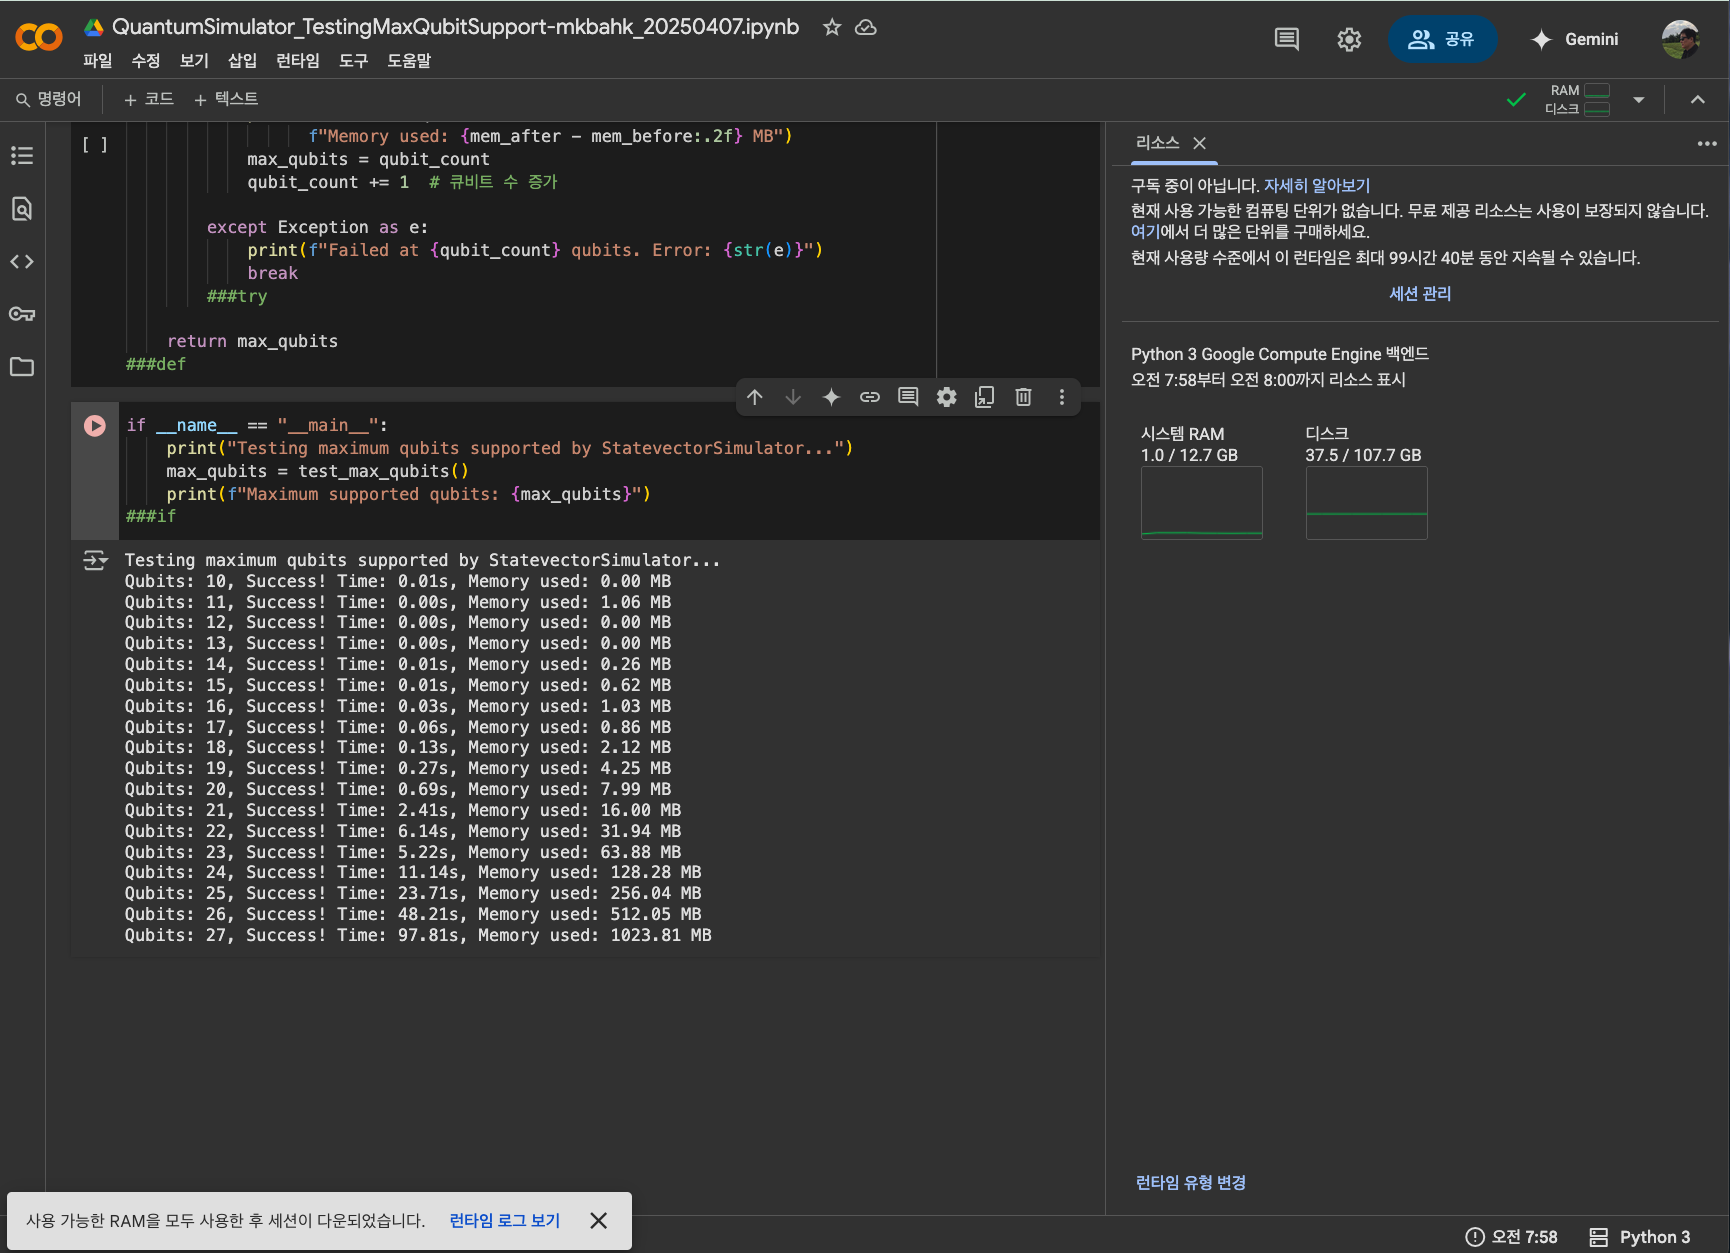